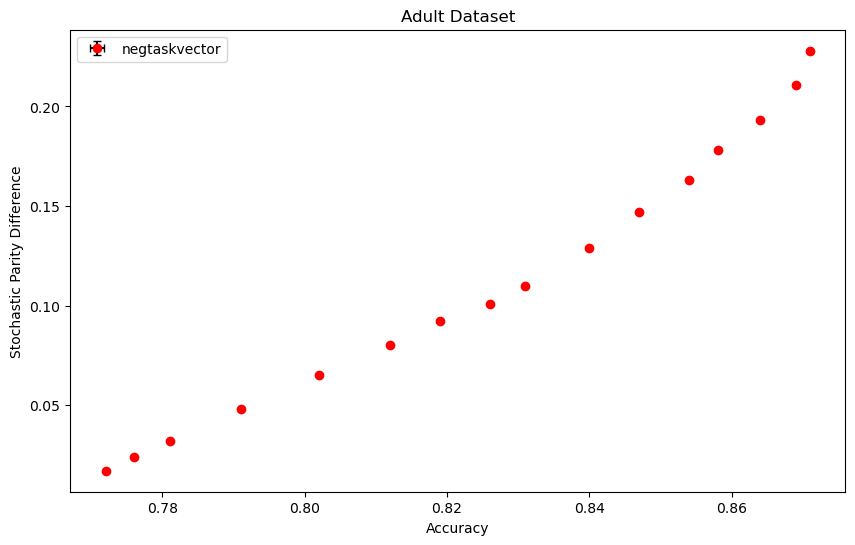

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽기
df = pd.read_csv('filtered.csv')

# forget, retain별로 그룹화하여 표준 편차 계산
std_df = df.groupby(['forget', 'retain']).agg({
    'valid/accuracy': 'std',
    'valid/spd': 'std'
}).reset_index()

# 평균 계산을 위해 다시 그룹화
mean_df = df.groupby(['forget', 'retain']).agg({
    'valid/accuracy': 'mean',
    'valid/spd': 'mean'
}).reset_index()

# std와 mean을 병합하여 하나의 DataFrame으로 만듦
plot_df = mean_df.merge(std_df, on=['forget', 'retain'], suffixes=('', '_std'))

# 2D 플롯 생성
plt.figure(figsize=(10, 6))
plt.errorbar(
    plot_df['valid/accuracy'], plot_df['valid/spd'],
    xerr=plot_df['valid/accuracy_std'], yerr=plot_df['valid/spd_std'],
    fmt='o', color='red', ecolor='black', capsize=3, label='negtaskvector'
)
plt.xlabel('Accuracy')
plt.ylabel('Stochastic Parity Difference')
plt.title('Adult Dataset')
plt.legend()
plt.savefig('filtered.svg', format='svg')
plt.show()

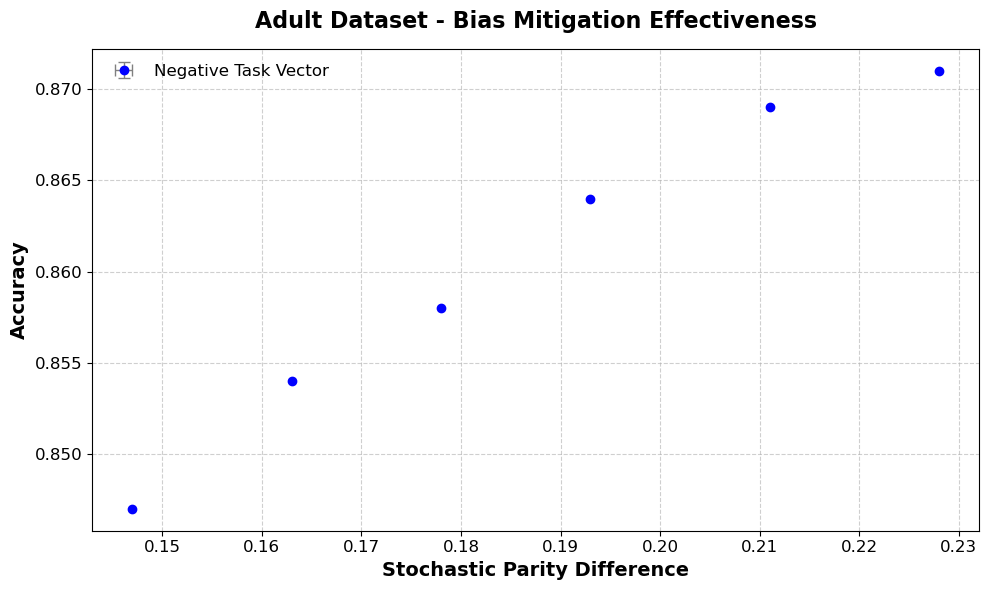

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽기
df = pd.read_csv('filtered.csv')

# forget, retain별로 그룹화하여 표준 편차 계산
std_df = df.groupby(['forget', 'retain']).agg({
    'valid/accuracy': 'std',
    'valid/spd': 'std'
}).reset_index()

# 평균 계산을 위해 다시 그룹화
mean_df = df.groupby(['forget', 'retain']).agg({
    'valid/accuracy': 'mean',
    'valid/spd': 'mean'
}).reset_index()

# std와 mean을 병합하여 하나의 DataFrame으로 만듦
plot_df = mean_df.merge(std_df, on=['forget', 'retain'], suffixes=('', '_std'))

plot_df = plot_df[:6]
# 2D 플롯 생성
plt.figure(figsize=(10, 6))
plt.errorbar(
    plot_df['valid/spd'], plot_df['valid/accuracy'],
    xerr=plot_df['valid/spd_std'], yerr=plot_df['valid/accuracy_std'],
    fmt='o', color='blue', ecolor='gray', elinewidth=1, capsize=4, label='Negative Task Vector'
)

# 스타일 추가
plt.xlabel('Stochastic Parity Difference', fontsize=14, weight='bold')
plt.ylabel('Accuracy', fontsize=14, weight='bold')
plt.title('Adult Dataset - Bias Mitigation Effectiveness', fontsize=16, weight='bold', pad=15)
plt.legend(loc='upper left', fontsize=12, frameon=False)
plt.grid(True, linestyle='--', alpha=0.6)

# 눈금과 여백 조정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# 플롯 저장 및 표시
plt.savefig('filtered.svg', format='svg')
plt.show()

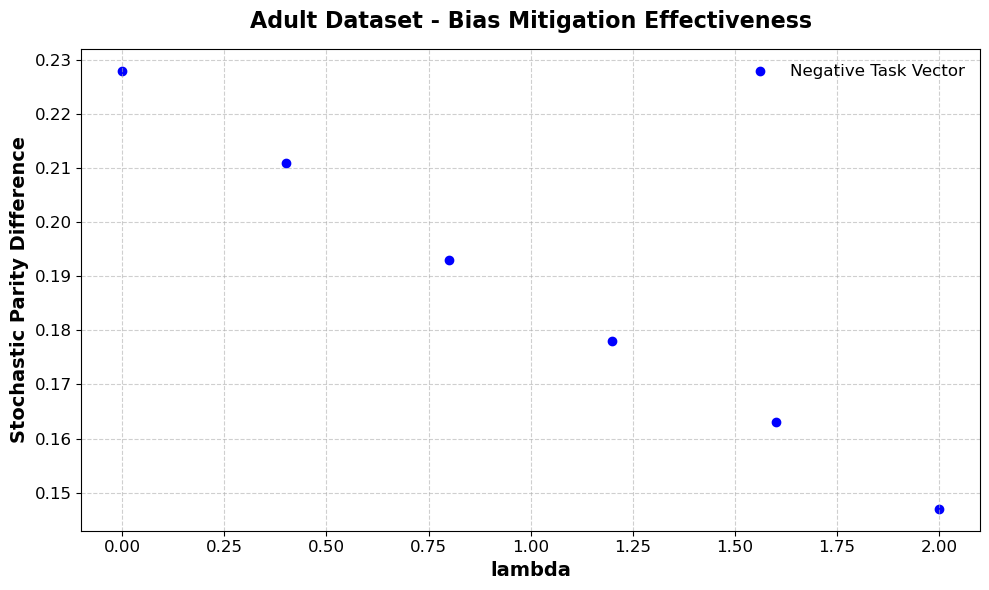

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽기
df = pd.read_csv('filtered.csv')

# forget, retain별로 그룹화하여 표준 편차 계산
std_df = df.groupby(['forget', 'retain']).agg({
    'valid/accuracy': 'std',
    'valid/spd': 'std'
}).reset_index()

# 평균 계산을 위해 다시 그룹화
mean_df = df.groupby(['forget', 'retain']).agg({
    'valid/accuracy': 'mean',
    'valid/spd': 'mean'
}).reset_index()

# std와 mean을 병합하여 하나의 DataFrame으로 만듦
plot_df = mean_df.merge(std_df, on=['forget', 'retain'], suffixes=('', '_std'))

plot_df = plot_df[:6]
# 2D 플롯 생성
plt.figure(figsize=(10, 6))
plt.scatter(
    plot_df['forget'], plot_df['valid/spd'],
    color='blue', label='Negative Task Vector'
)

# 스타일 추가
plt.xlabel('lambda', fontsize=14, weight='bold')
plt.ylabel('Stochastic Parity Difference', fontsize=14, weight='bold')
plt.title('Adult Dataset - Bias Mitigation Effectiveness', fontsize=16, weight='bold', pad=15)
plt.legend(loc='upper right', fontsize=12, frameon=False)
plt.grid(True, linestyle='--', alpha=0.6)

# 눈금과 여백 조정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# 플롯 저장 및 표시
plt.savefig('filtered_spd.svg', format='svg')
plt.show()

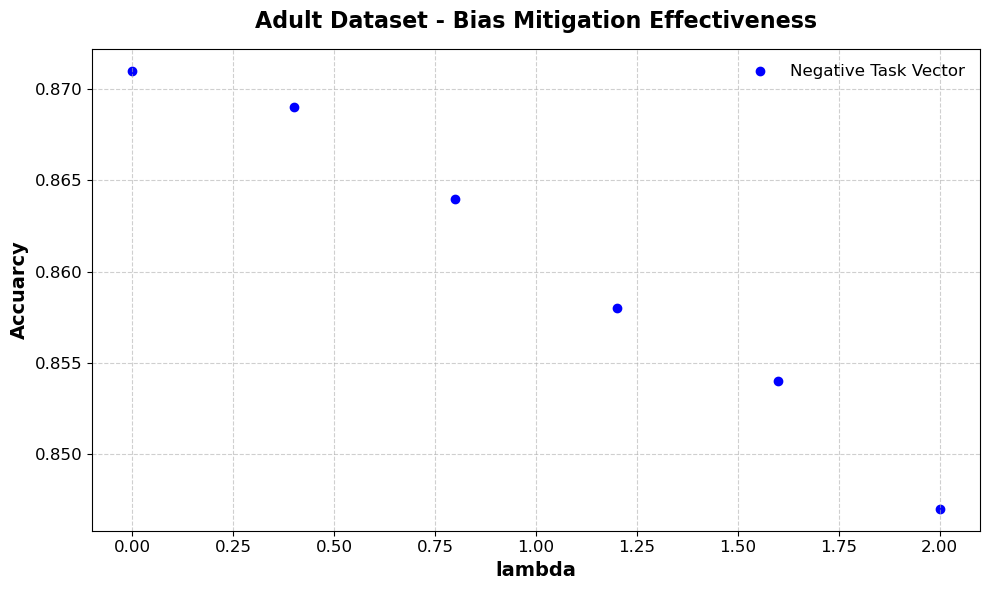

In [7]:
# 2D 플롯 생성
plt.figure(figsize=(10, 6))
plt.scatter(
    plot_df['forget'], plot_df['valid/accuracy'],
    color='blue', label='Negative Task Vector'
)

# 스타일 추가
plt.xlabel('lambda', fontsize=14, weight='bold')
plt.ylabel('Accuarcy', fontsize=14, weight='bold')
plt.title('Adult Dataset - Bias Mitigation Effectiveness', fontsize=16, weight='bold', pad=15)
plt.legend(loc='upper right', fontsize=12, frameon=False)
plt.grid(True, linestyle='--', alpha=0.6)

# 눈금과 여백 조정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# 플롯 저장 및 표시
plt.savefig('filtered_acc.svg', format='svg')
plt.show()

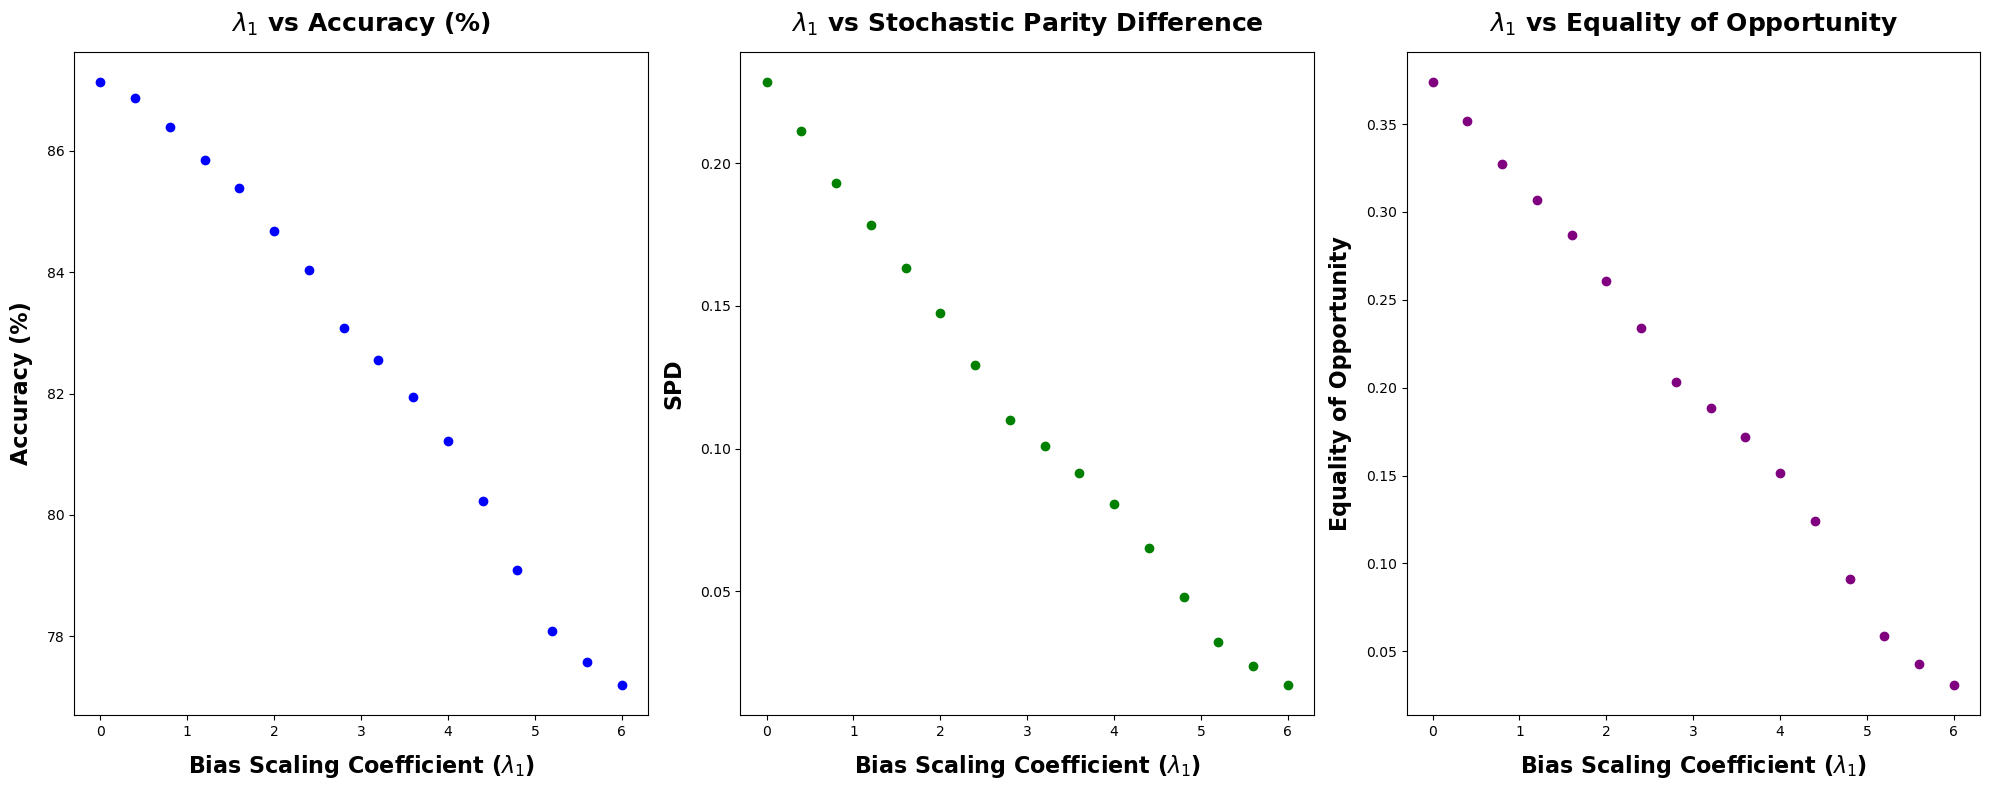

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽기
df = pd.read_csv('filtered.csv')

# forget, retain별로 그룹화하여 표준 편차 및 평균 계산
std_df = df.groupby(['forget', 'retain']).agg({
    'valid/accuracy': 'std',
    'valid/spd': 'std',
    'valid/equal_opportunity': 'std'
}).reset_index()

mean_df = df.groupby(['forget', 'retain']).agg({
    'valid/accuracy': 'mean',
    'valid/spd': 'mean',
    'valid/equal_opportunity': 'mean'
}).reset_index()

# std와 mean을 병합하여 최종 DataFrame 생성
plot_df = mean_df.merge(std_df, on=['forget', 'retain'], suffixes=('', '_std'))

# Accuracy를 백분율로 변환
plot_df['valid/accuracy'] *= 100

# 3개의 플롯을 가로로 배치
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharex=True)

# 첫 번째 플롯: lambda_1 vs valid/accuracy (백분율)
axes[0].scatter(plot_df['forget'], plot_df['valid/accuracy'], color='blue')
axes[0].set_title(r'$\lambda_1$ vs Accuracy (%)', fontsize=18, weight='bold', pad=15)
axes[0].set_xlabel(r'Bias Scaling Coefficient ($\lambda_1$)', fontsize=16, weight='bold', labelpad=10)
axes[0].set_ylabel('Accuracy (%)', fontsize=16, weight='bold', labelpad=10)

# 두 번째 플롯: lambda_1 vs valid/spd
axes[1].scatter(plot_df['forget'], plot_df['valid/spd'], color='green')
axes[1].set_title(r'$\lambda_1$ vs Stochastic Parity Difference', fontsize=18, weight='bold', pad=15)
axes[1].set_xlabel(r'Bias Scaling Coefficient ($\lambda_1$)', fontsize=16, weight='bold', labelpad=10)
axes[1].set_ylabel('SPD', fontsize=16, weight='bold', labelpad=10)

# 세 번째 플롯: lambda_1 vs Equality of Opportunity
axes[2].scatter(plot_df['forget'], plot_df['valid/equal_opportunity'], color='purple')
axes[2].set_title(r'$\lambda_1$ vs Equality of Opportunity', fontsize=18, weight='bold', pad=15)
axes[2].set_xlabel(r'Bias Scaling Coefficient ($\lambda_1$)', fontsize=16, weight='bold', labelpad=10)
axes[2].set_ylabel('Equality of Opportunity', fontsize=16, weight='bold', labelpad=10)

# # x, y 축 눈금 크기 감소
# for ax in axes:
#     ax.tick_params(axis='both', which='major', labelsize=12)

# 레이아웃 조정
plt.tight_layout()

# 플롯 저장 및 표시
plt.savefig('lambda1_scatter_plots_with_larger_text.svg', format='svg')
plt.show()


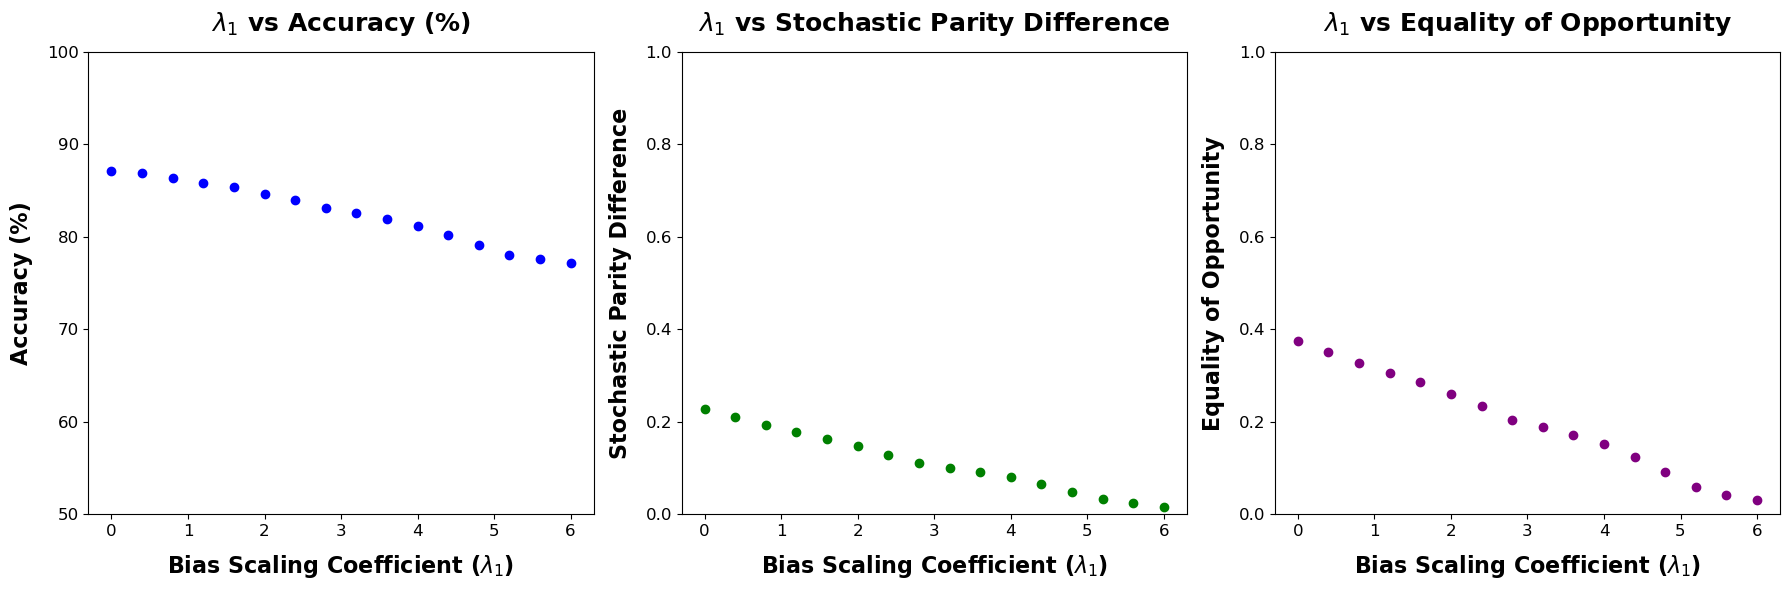

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽기
df = pd.read_csv('filtered.csv')

# forget, retain별로 그룹화하여 표준 편차 및 평균 계산
std_df = df.groupby(['forget', 'retain']).agg({
    'valid/accuracy': 'std',
    'valid/spd': 'std',
    'valid/equal_opportunity': 'std'
}).reset_index()

mean_df = df.groupby(['forget', 'retain']).agg({
    'valid/accuracy': 'mean',
    'valid/spd': 'mean',
    'valid/equal_opportunity': 'mean'
}).reset_index()

# std와 mean을 병합하여 최종 DataFrame 생성
plot_df = mean_df.merge(std_df, on=['forget', 'retain'], suffixes=('', '_std'))

# Accuracy를 백분율로 변환
plot_df['valid/accuracy'] *= 100

# 3개의 플롯을 가로로 배치 (비율 조정)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# 첫 번째 플롯: lambda_1 vs valid/accuracy (50~100 범위)
axes[0].scatter(plot_df['forget'], plot_df['valid/accuracy'], color='blue')
axes[0].set_ylim(50, 100)
axes[0].set_title(r'$\lambda_1$ vs Accuracy (%)', fontsize=18, weight='bold', pad=15)
axes[0].set_xlabel(r'Bias Scaling Coefficient ($\lambda_1$)', fontsize=16, weight='bold', labelpad=10)
axes[0].set_ylabel('Accuracy (%)', fontsize=16, weight='bold', labelpad=10)

# 두 번째 플롯: lambda_1 vs valid/spd (0~1 범위)
axes[1].scatter(plot_df['forget'], plot_df['valid/spd'], color='green')
axes[1].set_ylim(0, 1)
axes[1].set_title(r'$\lambda_1$ vs Stochastic Parity Difference', fontsize=18, weight='bold', pad=15)
axes[1].set_xlabel(r'Bias Scaling Coefficient ($\lambda_1$)', fontsize=16, weight='bold', labelpad=10)
axes[1].set_ylabel('Stochastic Parity Difference', fontsize=16, weight='bold', labelpad=10)

# 세 번째 플롯: lambda_1 vs Equality of Opportunity (0~1 범위)
axes[2].scatter(plot_df['forget'], plot_df['valid/equal_opportunity'], color='purple')
axes[2].set_ylim(0, 1)
axes[2].set_title(r'$\lambda_1$ vs Equality of Opportunity', fontsize=18, weight='bold', pad=15)
axes[2].set_xlabel(r'Bias Scaling Coefficient ($\lambda_1$)', fontsize=16, weight='bold', labelpad=10)
axes[2].set_ylabel('Equality of Opportunity', fontsize=16, weight='bold', labelpad=10)

# x, y 축 눈금 크기 감소
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=12)

# 레이아웃 조정
plt.tight_layout()

# 플롯 저장 및 표시
plt.savefig('lambda1_scatter_plots_with_fixed_ranges.svg', format='svg')
plt.show()


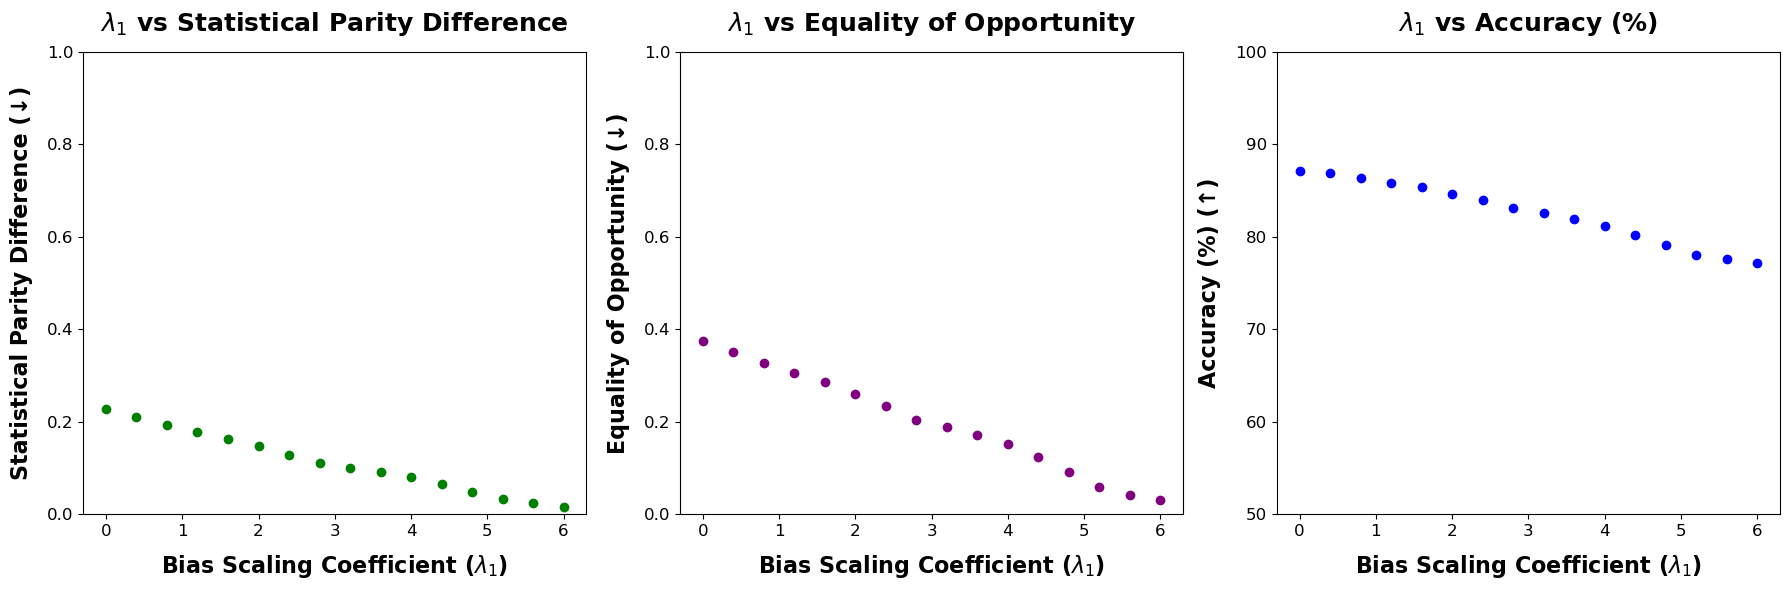

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽기
df = pd.read_csv('filtered.csv')

# forget, retain별로 그룹화하여 표준 편차 및 평균 계산
std_df = df.groupby(['forget', 'retain']).agg({
    'valid/accuracy': 'std',
    'valid/spd': 'std',
    'valid/equal_opportunity': 'std'
}).reset_index()

mean_df = df.groupby(['forget', 'retain']).agg({
    'valid/accuracy': 'mean',
    'valid/spd': 'mean',
    'valid/equal_opportunity': 'mean'
}).reset_index()

# std와 mean을 병합하여 최종 DataFrame 생성
plot_df = mean_df.merge(std_df, on=['forget', 'retain'], suffixes=('', '_std'))

# Accuracy를 백분율로 변환
plot_df['valid/accuracy'] *= 100

# 3개의 플롯을 가로로 배치 (비율 조정)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# 첫 번째 플롯: lambda_1 vs Statistical Parity Difference (0~1 범위)
axes[0].scatter(plot_df['forget'], plot_df['valid/spd'], color='green')
axes[0].set_ylim(0, 1)
axes[0].set_title(r'$\lambda_1$ vs Statistical Parity Difference', fontsize=18, weight='bold', pad=15)
axes[0].set_xlabel(r'Bias Scaling Coefficient ($\lambda_1$)', fontsize=16, weight='bold', labelpad=10)
axes[0].set_ylabel('Statistical Parity Difference (↓)', fontsize=16, weight='bold', labelpad=10)

# 두 번째 플롯: lambda_1 vs Equality of Opportunity (0~1 범위)
axes[1].scatter(plot_df['forget'], plot_df['valid/equal_opportunity'], color='purple')
axes[1].set_ylim(0, 1)
axes[1].set_title(r'$\lambda_1$ vs Equality of Opportunity', fontsize=18, weight='bold', pad=15)
axes[1].set_xlabel(r'Bias Scaling Coefficient ($\lambda_1$)', fontsize=16, weight='bold', labelpad=10)
axes[1].set_ylabel('Equality of Opportunity (↓)', fontsize=16, weight='bold', labelpad=10)

# 세 번째 플롯: lambda_1 vs Accuracy (50~100 범위)
axes[2].scatter(plot_df['forget'], plot_df['valid/accuracy'], color='blue')
axes[2].set_ylim(50, 100)
axes[2].set_title(r'$\lambda_1$ vs Accuracy (%)', fontsize=18, weight='bold', pad=15)
axes[2].set_xlabel(r'Bias Scaling Coefficient ($\lambda_1$)', fontsize=16, weight='bold', labelpad=10)
axes[2].set_ylabel('Accuracy (%) (↑)', fontsize=16, weight='bold', labelpad=10)

# x, y 축 눈금 크기 감소
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=12)

# 레이아웃 조정
plt.tight_layout()

# 플롯 저장 및 표시
plt.savefig('lambda1_scatter_plots_with_arrows.svg', format='svg')
plt.show()
